Tải bộ dữ liệu WELFake

In [1]:
!gdown 1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3

Downloading...
From (original): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3
From (redirected): https://drive.google.com/uc?id=1CgDGe1t2_SUVw9VvzOpMeRNfIvdHsjY3&confirm=t&uuid=b420a5d1-154e-409f-8b46-b33691a01f69
To: /content/WELFake_Dataset.csv
100% 245M/245M [00:08<00:00, 30.1MB/s]


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/WELFake_Dataset.csv")
df.dropna(subset=['text', 'title'], inplace=True)
df['text'] = df['title'] + ' ' + df['text']

# Vocabulary size and sentence length
vocab_size = 10000
sent_length = 500

# Encode the text using one-hot encoding
corpus = df['text'].tolist()
onehot = [one_hot(words, vocab_size) for words in corpus]

# Pad the sequences
padded_onehot = pad_sequences(onehot, padding='post', maxlen=sent_length)

# Convert to numpy array
padded_data = np.array(padded_onehot)
label = np.array(df['label'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_data, label, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Model creation
embedding_vector_features = 40  # Features representation
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64
)


Training data shape: (57229, 500)
Testing data shape: (14308, 500)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 37s 31ms/step - accuracy: 0.6431 - loss: 0.6142 - val_accuracy: 0.6863 - val_loss: 0.5223
Epoch 2/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.8199 - loss: 0.3952 - val_accuracy: 0.8922 - val_loss: 0.2960
Epoch 3/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.8925 - loss: 0.2884 - val_accuracy: 0.5906 - val_loss: 0.6383
Epoch 4/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6944 - loss: 0.4983 - val_accuracy: 0.8658 - val_loss: 0.3374
Epoch 5/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8926 - loss: 0.2820 - val_accuracy: 0.9436 - val_loss: 0.1760
Epoch 6/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9300 - loss: 0.1927 - val_accuracy: 0.9510 - val_loss: 0.1424
Epoch 7/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9728 - loss: 0.0822 - val_accuracy: 0.9614 - val_loss: 0.1202
Epoch 8/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9829 - loss: 0.05

Vẽ đồ thị học accuracy và loss

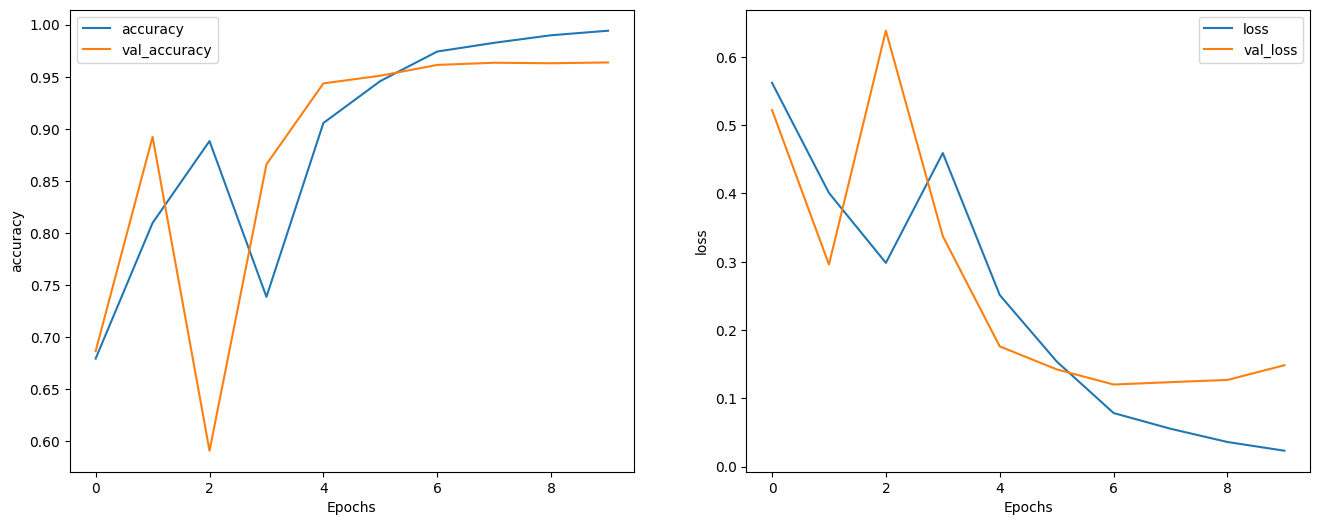

In [3]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):

    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

Đánh giá mô hình 

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.6, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step
Accuracy: 0.9627481129438077


In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7081
           1       0.98      0.95      0.96      7227

    accuracy                           0.96     14308
   macro avg       0.96      0.96      0.96     14308
weighted avg       0.96      0.96      0.96     14308



Vẽ ma trận nhầm lẫn 

Text(70.72222222222221, 0.5, 'Real Labels')

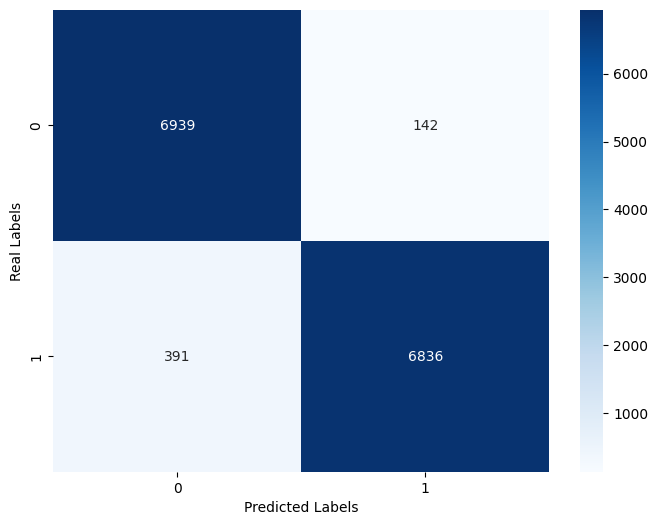

In [6]:
import seaborn as sns

plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

conf_matrix = confusion_matrix(y_test,y_pred)

true_negatives = conf_matrix[0][0]
false_positives = conf_matrix[0][1]
false_negatives = conf_matrix[1][0]
true_positives = conf_matrix[1][1]

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Precision: 0.9797
Recall: 0.9459
F1-score: 0.9625
Accuracy: 0.9627
